## The Lifecycle of a Plot

This tutorial aims to show the beginning, middle, and end of a single visualization using Matplotlib. We'll begin with some raw data and end by saving a figure of a customized visualization. Along the way we try to highlight some neat features and best-practices using Matplotlib

### A note on the Object-Oriented API vs. Pyplot

Matplotlib has two interfaces. The first is an object-oriented (OO) interface. In this case, we utilize an instance of axes.Axes in order to render visualizations on an instance of figure.Figure.

The second is based on MATLAB and uses a state-based interface. This is encapsulated in the pyplot module. See the pyplot tutorials for a more in-depth look at the pyplot interface.

Most of the terms are straightforward but the main thing to remember is that:

- The Figure is the final image that may contain 1 or more Axes.
- The Axes represent an individual plot (don't confuse this with the word "axis", which refers to the x/y axis of a plot).

We call methods that do the plotting directly from the Axes, which gives us much more flexibility and power in customizing our plot.

#### Note

In general, try to use the object-oriented interface over the pyplot interface.

### Our data

We'll use the data from the post from which this tutorial was derived. It contains sales information for a number of companies.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

### Getting started

This data is naturally visualized as a barplot, with one bar per group. To do this with the object-oriented approach, we first generate an instance of figure.Figure and axes.Axes. The Figure is like a canvas, and the Axes is a part of that canvas on which we will make a particular visualization.

#### Note

Figures can have multiple axes on them. For information on how to do this, see the Tight Layout tutorial.

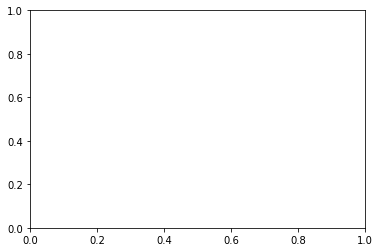

In [5]:
fig, ax = plt.subplots()

Now that we have an Axes instance, we can plot on top of it.

<BarContainer object of 10 artists>

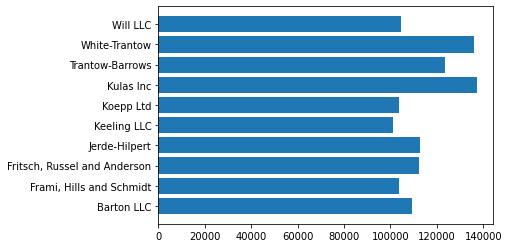

In [10]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)

### Controlling the style

There are many styles available in Matplotlib in order to let you tailor your visualization to your needs. To see a list of styles, we can use style.

In [11]:
print(plt.style.available)

['Solarize_Light2', '_classic_test', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


You can activate a style with the following:

In [12]:
plt.style.use('fivethirtyeight')

Now let's remake the above plot to see how it looks:

<BarContainer object of 10 artists>

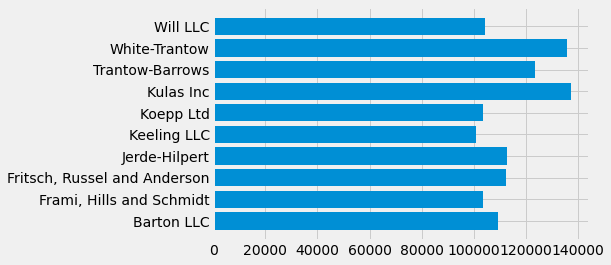

In [14]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)

The style controls many things, such as color, linewidths, backgrounds, etc.

### Customizing the plot

Now we've got a plot with the general look that we want, so let's fine-tune it so that it's ready for print. First let's rotate the labels on the x-axis so that they show up more clearly. We can gain access to these labels with the axes.Axes.get_xticklabels() method

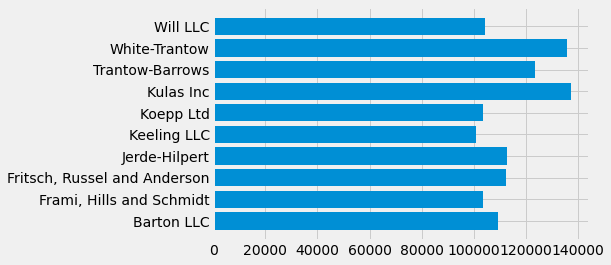

In [15]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()

If we'd like to set the property of many items at once, it's useful to use the pyplot.setp() function. This will take a list (or many lists) of Matplotlib objects, and attempt to set some style element of each one.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

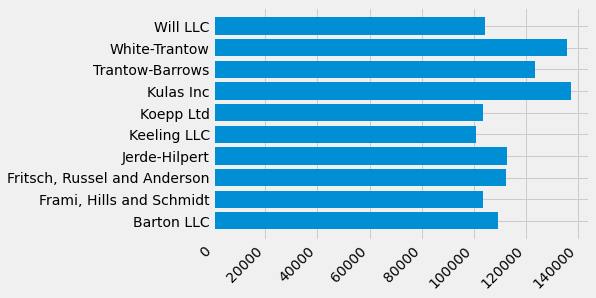

In [16]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

It looks like this cut off some of the labels on the bottom. We can tell Matplotlib to automatically make room for elements in the figures that we create. To do this we set the autolayout value of our rcParams. For more information on controlling the style, layout, and other features of plots with rcParams, see Customizing Matplotlib with style sheets and rcParams.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

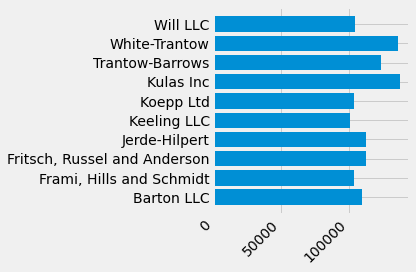

In [17]:
plt.rcParams.update({'figure.autolayout': True})

fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

Next, we add labels to the plot. To do this with the OO interface, we can use the Artist.set() method to set properties of this Axes object

[Text(0, 0.5, 'Company'),
 (-10000.0, 140000.0),
 Text(0.5, 0, 'Total Revenue'),
 Text(0.5, 1.0, 'Company Revenue')]

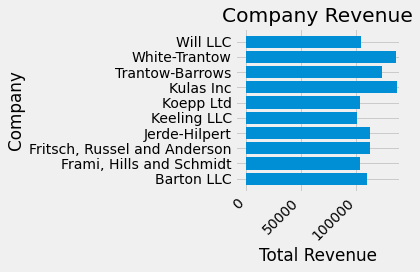

In [18]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')

We can also adjust the size of this plot using the pyplot.subplots() function. We can do this with the figsize kwarg.

#### Note

While indexing in NumPy follows the form (row, column), the figsize kwarg follows the form (width, height). This follows conventions in visualization, which unfortunately are different from those of linear algebra.

[Text(0, 0.5, 'Company'),
 (-10000.0, 140000.0),
 Text(0.5, 0, 'Total Revenue'),
 Text(0.5, 1.0, 'Company Revenue')]

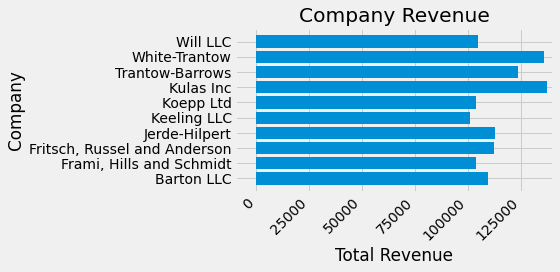

In [19]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')

For labels, we can specify custom formatting guidelines in the form of functions. Below we define a function that takes an integer as input, and returns a string as an output. When used with Axis.set_major_formatter or Axis.set_minor_formatter, they will automatically create and use a ticker.FuncFormatter class.

For this function, the x argument is the original tick label and pos is the tick position. We will only use x here but both arguments are needed.

In [20]:
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s

We can then apply this function to the labels on our plot. To do this, we use the xaxis attribute of our axes. This lets you perform actions on a specific axis on our plot.

TypeError: 'formatter' must be an instance of matplotlib.ticker.Formatter, not a function

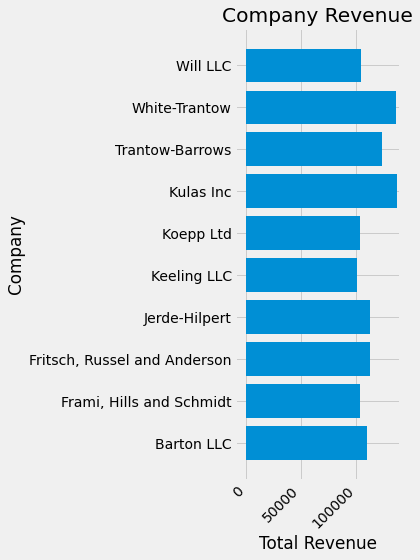

In [24]:
fig, ax = plt.subplots(figsize=(6, 8))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')
ax.xaxis.set_major_formatter(currency)

### Combining multiple visualizations

It is possible to draw multiple plot elements on the same instance of axes.Axes. To do this we simply need to call another one of the plot methods on that axes object.

TypeError: 'formatter' must be an instance of matplotlib.ticker.Formatter, not a function

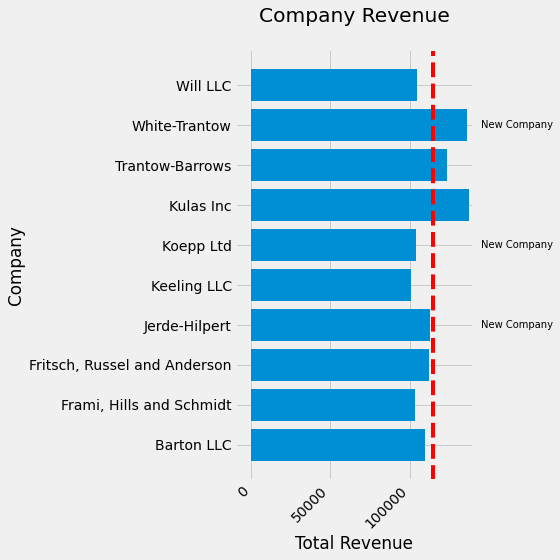

In [25]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

# Add a vertical line, here we set the style in the function call
ax.axvline(group_mean, ls='--', color='r')

# Annotate new companies
for group in [3, 5, 8]:
    ax.text(145000, group, "New Company", fontsize=10,
            verticalalignment="center")

# Now we move our title up since it's getting a little cramped
ax.title.set(y=1.05)

ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')
ax.xaxis.set_major_formatter(currency)
ax.set_xticks([0, 25e3, 50e3, 75e3, 100e3, 125e3])
fig.subplots_adjust(right=.1)

plt.show()

### Saving our plot

Now that we're happy with the outcome of our plot, we want to save it to disk. There are many file formats we can save to in Matplotlib. To see a list of available options, use:

In [26]:
print(fig.canvas.get_supported_filetypes())

{'ps': 'Postscript', 'eps': 'Encapsulated Postscript', 'pdf': 'Portable Document Format', 'pgf': 'PGF code for LaTeX', 'png': 'Portable Network Graphics', 'raw': 'Raw RGBA bitmap', 'rgba': 'Raw RGBA bitmap', 'svg': 'Scalable Vector Graphics', 'svgz': 'Scalable Vector Graphics', 'jpg': 'Joint Photographic Experts Group', 'jpeg': 'Joint Photographic Experts Group', 'tif': 'Tagged Image File Format', 'tiff': 'Tagged Image File Format'}


We can then use the figure.Figure.savefig() in order to save the figure to disk. Note that there are several useful flags we show below:

- transparent=True makes the background of the saved figure transparent if the format supports it.
- dpi=80 controls the resolution (dots per square inch) of the output.
- bbox_inches="tight" fits the bounds of the figure to our plot.

In [27]:
# Uncomment this line to save the figure.
# fig.savefig('sales.png', transparent=False, dpi=80, bbox_inches="tight")